# Modelització

- Amb l'anàlisi del sistema vam identificar un seguit de factors
- Vam fer assumpcions de quins factors serien rellevants
- Amb aquest conjunt de factors identificats comencem la modelització
- És important prendre nota de les assumpcions que anem fent durant el procés de simulació per poder revisar-les a posteriori

- Representació matemàtica de variables i relacions
  - Podem representar la relació entre diferents factors en forma de gràfica, taula o fórmula.
  - Analitzar dades del sistema com taules i gràfics ens pot ajudar a identificar comportaments típics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from IPython.display import Math, display
sp.init_printing()
n = 50

def show(*args):
    out = ""
    for arg in args:
        if isinstance(arg, (sp.Expr, sp.Eq)):
            arg = sp.latex(arg)
        else:
            arg = str(arg)
        out += arg
    display(Math(out))
    
qq = "\quad "

### Modelant el canvi
- Identifica el patró de canvi
- Fes una assumpció sobre el seu comportament
- Expressa matemàticament una aproximació

- El canvi pot ser discret o continu
- Pot ser constant, proporcional a alguna variable o tindre un comportament característic
- Podem modelar-lo amb equacions de diferències, diferencials ...

### Exemple: Cultiu de bacteris
- Tenim un cultiu de 100 organismes idèntics
- Quants individus hi tindrem d'ací a una hora? 
- Com modelitzem aquest comportament?

- Assumim que:
    - Ritme de reproducció per individu és constant
    - La vida dels individus molt llarga
    - No interactuen
    - No estan limitats pels recursos

- Caracteritzem el canvi:
$$
\begin{align}
P_{n+1} & = P_n + \Delta P \\
\Delta P & = P_{n+1} - P_n \\
\Delta P & = 8 * P_n \\
\end{align}
$$

- En forma diferencial seria de la forma:
$$P'(t)=aP(t)$$
- Si resolem, tindrà un comportament exponencial
$$
\begin{align}
P(t) & = P_0 \,e^{a t} \\
P'(t) & = a \,P_0 \,e^{a t} = a \, P(t) \\
\end{align}
$$

Nota: Podríem tindre una població intoxicada amb una taxa de morts elevada i tindre una evolució purament de morts

### Comportaments típics
- Conèixer comportaments típics ens pot ajudar a escriure el model matemàtic
- Combinant aquests comportaments podem descriure comportaments més complexos
- Hi ha sistemes que tenen comportaments característics i que trobarem en repassar l'estat de l'art

- És convenient observar el comportament de les variables a valors extrems, la seva evolució i derivades
- Observar si hi ha zeros, asímptotes i cicles
- Hi ha més comportaments a banda dels que anem a estudiar a continuació

### Comportament lineal
- $f(x) = f_0 + a x \qquad f(x)' \propto cte$
- Per $x=0$ val $f_0$

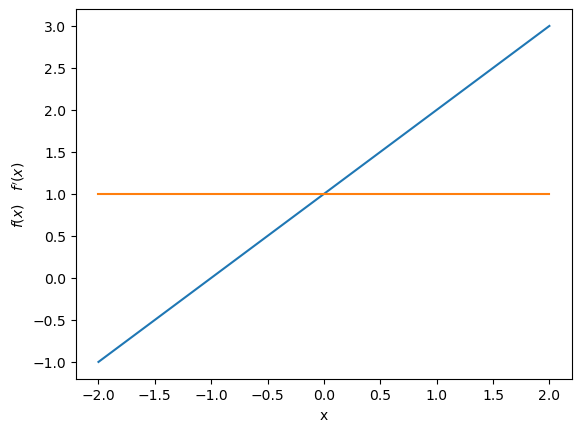

In [2]:
X = np.linspace(-2, 2, n)
Y1 = 1 + X
Y2 = np.ones(n)

fig, ax = plt.subplots()

ax.plot(X, Y1, X, Y2)
ax.set_ylabel('$f(x) \quad f\'(x)$')
ax.set_xlabel('x')
plt.show()

### Creixement exponencial
- $f(x) = f_0 \,e^{a x} \qquad f(x)' \propto f(x)$
- És positiva i per $x=0$ val $f_0$

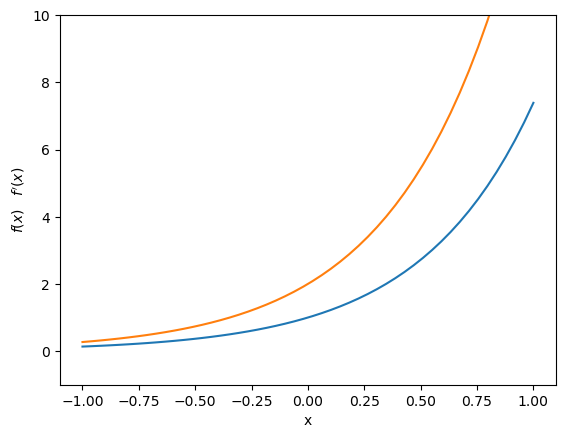

In [3]:
X = np.linspace(-1, 1, n)
Y1 = np.exp(2 * X)
Y2 = 2 * np.exp(2 * X)

fig, ax = plt.subplots()

ax.plot(X, Y1, X, Y2)
ax.set_ylabel('$f(x) \quad f\'(x)$')
ax.set_xlabel('x')
ax.set_ylim([-1, 10])
plt.show()

- La taxa de creixement és proporcional a la pròpia funció

### Decreixement exponencial
- $f(x) = f_0 \,e^{-a x} \qquad f(x)' \propto -f(x)$
- És positiva i per $x=0$ val $f_0$

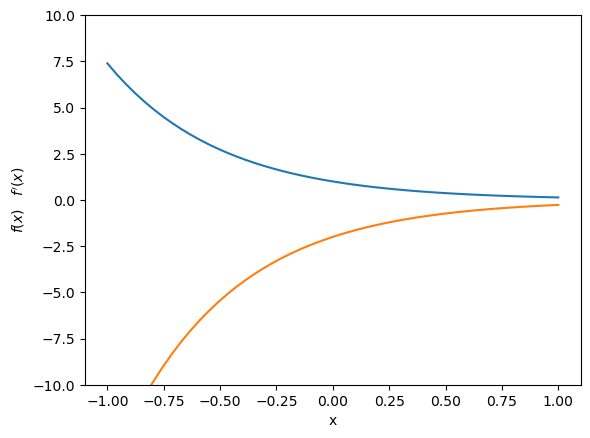

In [4]:
X = np.linspace(-1, 1, n)
Y1 = np.exp(-2 * X)
Y2 = -2 * Y1

fig, ax = plt.subplots()

ax.plot(X, Y1, X, Y2)
ax.set_ylabel('$f(x) \quad f\'(x)$')
ax.set_xlabel('x')
ax.set_ylim([-10, 10])
plt.show()

- La taxa de decreixement és proporcional a la pròpia funció
- Comportament asimptòtic

### Màxim simple
- $f(x) = a - (x - b)^2 \qquad f(x)' \propto -x$
- Per $x = b$ la funció té el màxim $a$

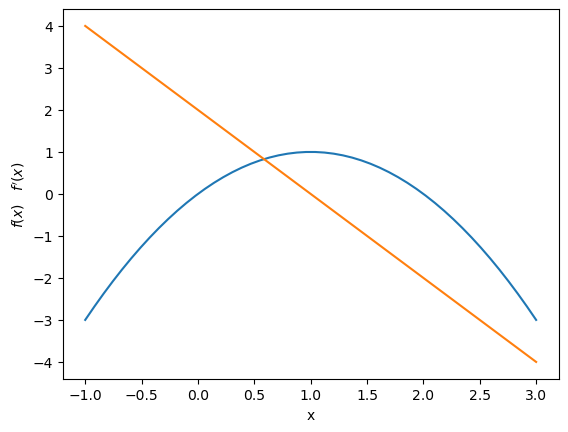

In [5]:
X = np.linspace(-1, 3, n)
Y1 = 1 - (X - 1)**2
Y2 = -2 * (X - 1)

fig, ax = plt.subplots()

ax.plot(X, Y1, X, Y2)
ax.set_ylabel('$f(x) \quad f\'(x)$')
ax.set_xlabel('x')
plt.show()

- La funció arriba a un màxim
- La taxa de creixement és inversament proporcional al valor

### Oscil·lació
- $f(x) = a \sin(\omega x) \qquad f(x)' \propto cos(\omega x)$
- És 0 a l'origen i a $x = n \pi / \omega$ per $n \in \mathbb{N}$

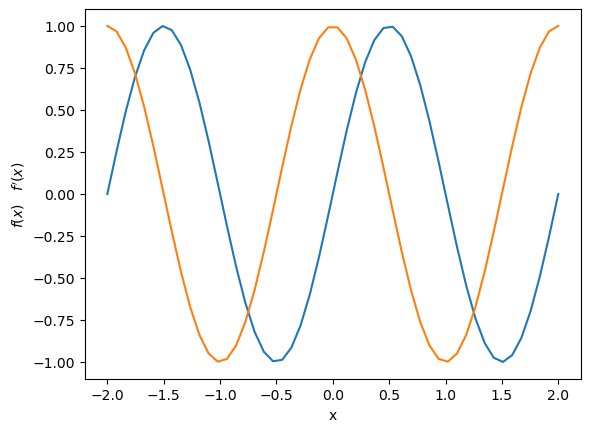

In [6]:
X = np.linspace(-2, 2, n)
Y1 = np.sin(np.pi * X)
Y2 = np.cos(np.pi * X)

fig, ax = plt.subplots()

ax.plot(X, Y1, X, Y2)
ax.set_ylabel('$f(x) \quad f\'(x)$')
ax.set_xlabel('x')
plt.show()

- Oscil·lació d'amplitud $a$
- Podem cercar l'origen de l'oscil·lació o ressonàncies

### Distribució normal
- $f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{\frac{-(x - \mu)^2}{2\sigma^2}}  \qquad f(x)' = -\frac{x}{\sigma^2} f(x)$
- Té el màxim a $x = \mu$, amplada $2.35 \sigma$ i tendeix a 0 als extrems

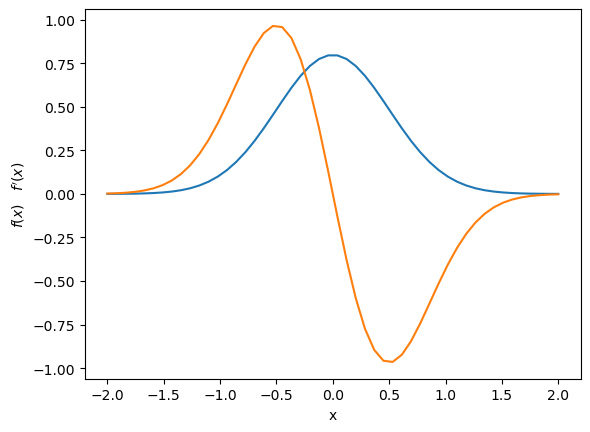

In [7]:
X = np.linspace(-2, 2, n)
Y1 = np.sqrt(2 / np.pi) * np.exp(-2 * X * X )
Y2 = - 4 * X * Y1

fig, ax = plt.subplots()

ax.plot(X, Y1, X, Y2)
ax.set_ylabel('$f(x) \quad f\'(x)$')
ax.set_xlabel('x')
plt.show()

- Distribució de probabilitat de variable continua
- Representació de distribució aleatòria d'esdeveniments

### Combinació de l'expressió matemàtica
- Hem d'anar amb compte com combinem els comporaments per construir el model
- Podem sumar funcions quan els efectes s'apilen
- Podem multiplicar-los quan un comportament modula a un altre

- En alguns casos també ens pot interessar compondre o convolucionar funcions

### Creixement limitat
- $f(x) = f_\infty (1 - \,e^{-a x}) \qquad f(x)' \propto -f(x)$
- Per $x$ grans tendeix a $f_\infty$

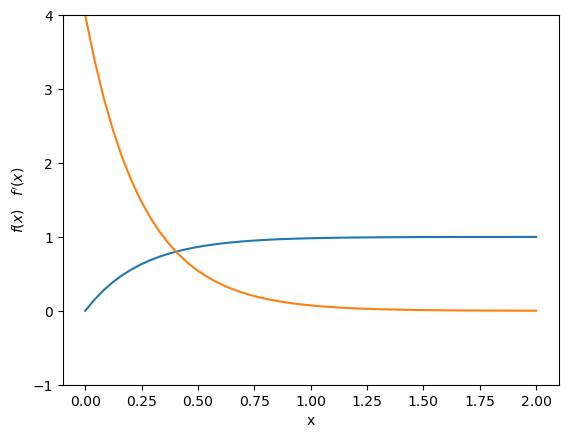

In [8]:
X = np.linspace(0, 2, n)
Y1 = (1 - np.exp(-4 * X))
Y2 = 4 * (1 - Y1) 

fig, ax = plt.subplots()

ax.plot(X, Y1, X, Y2)
ax.set_ylabel('$f(x) \quad f\'(x)$')
ax.set_xlabel('x')
ax.set_ylim([-1, 4])
plt.show()

- Té un creixement asimptòtic fins a un màxim
- Es construeix restant un decreixement logarítmic del valor constant final

### Creixement asimptòtic
- $f(x) = a + b x + c e^{-d x} \qquad f(x)' \propto f(x) - x$
- Per $x$ grans tendeix a la recta $a + bx$

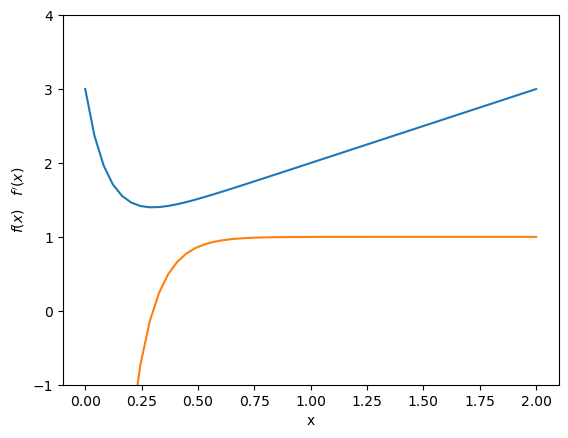

In [9]:
X = np.linspace(0, 2, n)
Y1 = 1 + X + 2 * np.exp(-10 * X)
Y2 = 1 - 20 * np.exp(-10 * X)

fig, ax = plt.subplots()

ax.plot(X, Y1, X, Y2)
ax.set_ylabel('$f(x) \quad f\'(x)$')
ax.set_xlabel('x')
ax.set_ylim([-1, 4])
plt.show()

- Té un creixement asimptòtic a la recta
- Es construeix afegint un decreixement logarítmic a una recta

### Màxim amb cua
- $f(x) = a x \,e^{-x/b} \qquad f(x)' = f(x) (1/x - 1/b)$
- És 0 a l'origen, per $x = b$ té el màxim $ab/e$, decreix asimptòticament a 0

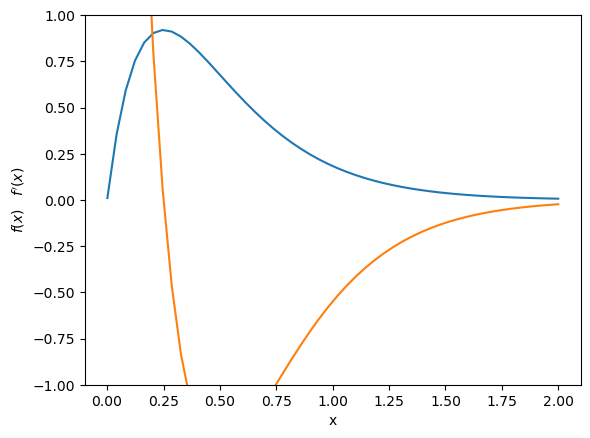

In [10]:
X = np.linspace(0.001, 2, n)
Y1 = 10 * X * np.exp(-4 * X)
Y2 = Y1 * ( 1 / X - 4)

fig, ax = plt.subplots()

ax.plot(X, Y1, X, Y2)
ax.set_ylabel('$f(x) \quad f\'(x)$')
ax.set_xlabel('x')
ax.set_ylim([-1, 1])
plt.show()

- Es construeix multiplicant una recta al decreixement logarítmic

### Oscil·lació esmorteïda
- $f(x) = a \,e^{-x/b} \sin(\omega x) \qquad f(x)' = a \,e^{-x/b} (w*\cos(\omega x) - b\sin(\omega x))$
- És 0 a l'origen i a $x = n \pi / \omega$ per $n \in \mathbb{N}$
- Per $x$ grans l'amplitud tendeix a 0

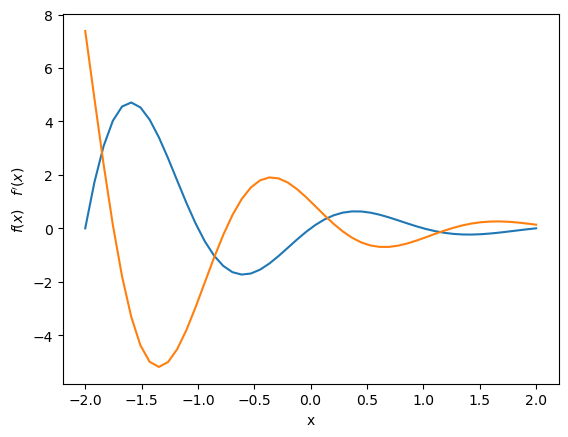

In [11]:
X = np.linspace(-2, 2, n)
Y1 = np.exp(-X) * np.sin(np.pi * X)
Y2 = np.exp(-X) * (np.cos(np.pi * X) - np.sin(np.pi * X))

fig, ax = plt.subplots()

ax.plot(X, Y1, X, Y2)
ax.set_ylabel('$f(x) \quad f\'(x)$')
ax.set_xlabel('x')
plt.show()

- Es construeix multiplicant un decreixement logarítmic a una oscil·lació
- Sol representar un procés ressonant esmorteït

### Construint funcions matemàtiques
- Hi ha comportaments que podem modelar de forma determinista
- Altres ens interessa representar distribucions de probabilitat per fer estimacions
$$ \int_0^X df(x) dx = f_X - f_0$$

- Exemple d'afluència de clients, esdeveniments naturals o control de qualitat.

- Molts cops ens interessarà representar el comportament en forma diferencial
- La representació gràfica del comportament ens pot donar idees sobre la forma diferencial

- També podem modelar el comportament amb equacions per parts 

- per les diferents fases d'un procés, per exemple.

### Exemple: Obertura d'un local comercial
- Obrim un nou local comercial, de 10 a 12h
- Esperem 500 clients en total, molts estaran esperant a les portes
- Quin ritme d'admissió de clients tindrem?

- Podem modelitzar un creixement lineal en el 15 primers minuts
- Que el 60% arribarà en la primera hora
$$Q'(t) =\begin{cases} a t & 10:00 < t < 10:15 \\
                    b      & 10:15 < t < 11:00 \\
                    b - ct & 11:00 < t < 12:00 \\
       \end{cases}$$

$$ \int_{10h}^{22h} dQ(t) dt = 500$$

$a \cdot 0.25 = b$

$b - c \cdot 1= 0 $

$b \cdot 0.25 / 2 + b \cdot 0.75 + b / 2 = 500$

$a = 1454 \qquad b = 363.6 \qquad c = 363.6$

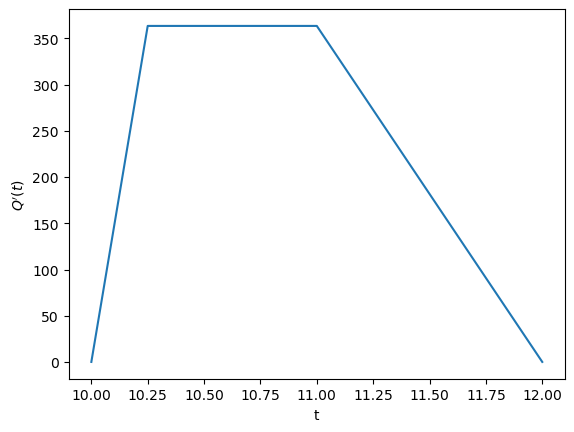

In [12]:
X = [10, 10.25, 11, 12]
Y = [0, 363.6, 363.6, 0]

fig, ax = plt.subplots()

ax.plot(X, Y)
ax.set_ylabel('$Q\'(t)$')
ax.set_xlabel('t')
plt.show()

- També podem modelitzar combinant un creixement lineal al principi i un decaïment exponencial cap al final

$$ Q'(t) = a t \,e^{-t/b} $$

In [13]:
from sympy.abc import a, b, t

Qp = a * (t - 10) * sp.exp(-(t - 10) / b)
Qp1 = sp.integrate(Qp, (t, 10, 11))
Qp2 = sp.integrate(Qp, (t, 10, 12))
#show(Qp1, qq, Qp2)
A, B = map(float, sp.nsolve([Qp1 - 300, Qp2 - 500], (a, b), (100, 1)))

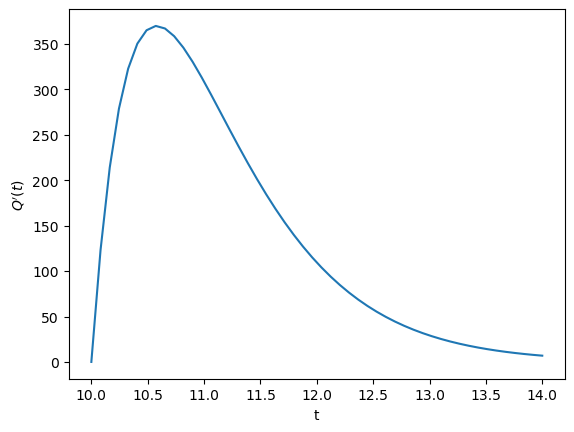

In [14]:
import numpy as np
X = np.linspace(10, 14, n)
Y = A * (X - 10) * np.exp(- (X - 10) / B)

fig, ax = plt.subplots()

ax.plot(X, Y)
ax.set_ylabel('$Q\'(t)$')
ax.set_xlabel('t')
#ax.set_ylim([-1, 1])
plt.show()

## Anàlisi del model
- Hem formulat el comportament del sistema
- Es pot simplificar?
- Quina és la relevància dels diferents termes?
- És consistent?

### Pes relatiu dels termes
- Un model amb cert nombre de variables, no tots solen tindre el mateix pes en el resultat final.
- Podem analitzar l'ordre de magnitud relatiu dels diferents termes
- Si algun terme és poc rellevant, el podem eliminar per simplificar el model

### Exemple:
- Tenim un model de la forma
$$y = \sqrt{x^2 + 2x + 1/x} \,e^{x^2 + 1/x}$$
- Si la resolució de $x$ és de l'ordre $1\%$

- Quan estudiem la propagació d'errors tindrem més eines per estimar la resolució necessària de cada variable

- Si $x \sim O(10)$
    - $x^2 + 2x + 1/x \sim O(10^2 + 10 + 10^{-1})$ i ho podem reduir a $x^2 + 2x$
    
    $$y = \sqrt{x^2 + 2x} \,e^{x^2}$$
    

- Si $x \sim O(10^{-1})$
    - $x^2 + 2x + 1/x \sim O(10^{-2} + 10^{-1} + 10^2)$ i ho podem reduir a $1/x$

$$y = \sqrt{1/x} \,e^{1/x}$$

- Si tenim múltiples variables, hem de fer l'exercici amb cada una d'elles
- A vegades podem fer desenvolupaments en sèries de Taylor per simplificar encara més

### Exemple:
- Tenim un model de la forma
$$z = a + b \sin(\omega x) - a \cos(\omega y)$$
- Si les resolucions de $x$ i $y$ són de l'ordre $1\%$ i tenim valors de $\omega x$ i $\omega y$ al voltant de 0.1

- Per Taylor tenim:
$$z = a + b (\omega x - \frac{1}{6}\omega^3 x^3 + \dots) - a (1 - \frac{1}{2}\omega^2 y^2 + \dots)$$

- i ho podem reduir a:
$$z = a + b \omega x - a (1 - \frac{1}{2}\omega^2 y^2 )$$

$$z = b \omega x + \frac{a}{2}\omega^2 y^2 $$

### Anàlisi dimensional
- En sistema internacional defineix 7 unitats de mesura (s, m, kg, A, K, mol, cd)
- La resta de magnituds físiques es poden expressar en termes d'aquestes unitats
- Qualsevol magnitud la podem descompondre en les seves dimensions
- Per simplicitat treballarem amb T, L i M

- Podem repassar el canvi d'unitats
- Recordem l'accident del mars climate orbiter a 1999

[àrea] = $L^2$

[velocitat] = $L T^{-1}$

[densitat] = $M L^{-3}$

[angle] = $L L^{-1}$ = 1

- Qualsevol model que escriguem ha de ser consistent
- Una avaluació bàsica de la seva consistència és l'anàlisi dimensional
- Les dimensions dels membres de l'equació han de ser iguals
- Les dimensions dels factors d'una suma han de ser iguals
- Les variables de les funcions trascendents han de ser adimensionals

### Exemple: Atracció de la terra
- Newton va descriure que l'atracció de dos cossos celestials és proporcional a les seves masses
    i inversament proporcional al quadrat de la seva distància
$$F \propto \frac{M_1 M_2}{r^2}$$

$[F] = [MLT^{-2}]$

$\left[ \frac{M_1 M_2}{r^2}  \right] = [M^2 L^{-2}]$

- L'expressió de la llei de gravitació universal és
$$F = G \frac{M_1 M_2}{r^2}$$

$[F] = [MLT^{-2}] = [G] \left[ \frac{M_1 M_2}{r^2}  \right] = [G][M^2 L^{-2}]$

$[G] = [M^{-1} L^3 T^{-2} ]$

### Exemple: oscil·lació del pèndol
- L'oscil·lació d'un pèndol es pot expressar com:

$$\frac{d\theta}{dt} = \omega B cos(\omega t)$$

- On $t$ es el temps i $\theta$ es l'angle

- Si fem l'anàlisi dimensional de l'expressió obtindrem
$$
\begin{align}
\left[\frac{d\theta}{dt}\right] = [T^{-1}] \qquad [\omega t] & = 1 \qquad & [\omega B] & = [T^{-1}] \\
[\omega] & = [T^{-1}] \qquad & [B] & = 1 \\
\end{align}
$$

- Sovint, l'anàlisi dimensional ens pot servir per corregir o descartar una formulació
- També ens pot servir per identificar les relacions entre paràmetres

- Considerem el pèndol i cerquem el seu període $p$
- Identifiquem que la seva oscil·lació depèn de la llargària del pèndol $l$, la seva massa $m$ i la força de la gravetat $g$

$$[p] = [T] = [l^a m^b g^c] = [L^a M^b (L T^{-2})^c]$$

$$
\begin{align}
T&: &-2c & = 1 \\
L&: &a + c & = 0 \\
M&: &b & = 0 \\
\end{align}
$$

$$[p] = [l^{1/2} g^{-1/2}] $$

- Obtenint que $p \propto \sqrt{l/g}$

- Podem millorar el nostre model afegint el fregament de l'aire $R$ i l'angle $\theta$

$$[p] = [T] = [l^a m^b g^c R^d \theta^e] = [L^a M^b (LT^{-2})^c (M L T^{-2})^d 1^e]$$

$$
\begin{align}
T&: &-2c -2d & = 1 \\
L&: &a + c + d& = 0 \\
M&: &b + d & = 0 \\
\end{align}
$$

- $e$ pot tindre qualsevol valor
- Ens sobra un grau de llibertat que ens permet expressar la relació en funció de $d$

$$
\begin{align}
b & = -d \\
c & = -d - 1/2 \\
a & = 1/2 \\
\end{align}
$$

$$[p] = [l^{1/2} m^{-d} g^{-1/2 - d} R^d \theta^e]$$

- Obtenint que $p \propto \sqrt{l/g} \cdot f\left(\frac{R}{mg}, \theta \right)$

- Si expressem la solució en funció de $c$
$$
\begin{align}
d & = -c - 1/2 \\
b & = c + 1/2 \\
a & = 1/2 \\
\end{align}
$$

$$[p] = [l^{1/2} m^{1/2 + c} g^{c} R^{-1/2 -c} \theta^e]$$

- Obtenint que $p \propto \sqrt{ml/R} \cdot f\left(\frac{R}{mg}, \theta \right)$

- Podem interpretar que el període d'oscil·lació té un factor que depèn de la gravetat $\sqrt{l/g}$
- Té un factor d'esmorteïment que depèn de R $\sqrt{ml/R}$
- I altres factors adimensionals com $\theta$ i $\frac{R}{mg}$

### Solució del model
- Un cop tenim una expresió matemàtica del model, hem de resoldre el model i interpretar els resultats
- Podem triar diferents estratègies
    - Resoldre les equacions diferencials
    - Resoldre equacions de diferències
    - Aproximacions numèriques
    - Fer simulacions
- Hem de cercar la més eficient per al resultat que busquem.

### Exemple: Creixement logístic
- Teniu un cultiu de 100 organismes idèntics
- Assumim que:
    - La vida dels individus molt llarga
    - No interactuen
- Aquest cop assumirem que SI estan limitats pels recursos
    - Ritme de reproducció per individu depèn de la població.

- La taxa de creixement per capita, decreixerà segons augmenta la població.

$$\frac{P'}{P} = (r - sP)$$

- Si definim $M$ com la població màxima, tindem una taxa $\frac{M-P}{M}$

$$𝑃′(𝑡)=𝑎𝑃(𝑡)\frac{M-P(t)}{M}$$

- És el que anomenem un comportament logístic o equació Verhulst-Pearl 

- Podem optar per resoldre l'equació diferencial $𝑃′(𝑡)=aP\frac{M-P}{M}$
$$
\begin{align}
\int \frac{M}{P(M-P)}\,dP = \int \frac{1}{P} + \frac{1}{(M-P)}\,dP & = \int a\, dt \\
\log P -\log (M-P) & = at +C \\
\log \frac{P}{M-P} & = at + C \\
\end{align}
$$

$$
\begin{align}
\frac{P}{M-P} & = e^{at+c} \\
P (1 + e^{at+c}) & = M e^{at+c} \\
P = M \frac{e^{at+c}}{1 + e^{at+c}} & = \frac{M}{1 + e^{d-at}} \\
\end{align}
$$

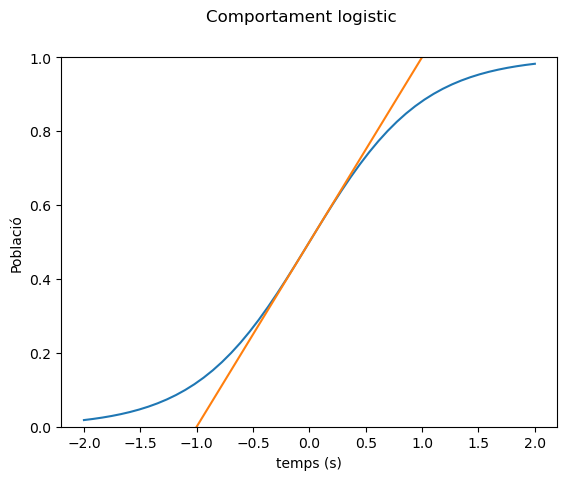

In [15]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-2, 2, 50)
Y1 = 1 / (1 + np.exp(-2 * X))
Y2 = 0.5 + X / 2

fig, ax = plt.subplots()
fig.suptitle('Comportament logistic')

ax.plot(X, Y1, X, Y2)
ax.set_ylabel('Població')
ax.set_xlabel('temps (s)')
ax.set_ylim([0, 1])

plt.show()

- En comptes de calcular una equació continua, podria interessar-nos estudiar l'evolució pas a pas. 
- Per exemple en poblacions que interaccionen de forma discreta
- Podríem resoldre l'equació de diferències

- En comptes de resoldre 
$$\frac{d𝑃}{d𝑡}=aP\frac{M-P}{M}$$
- tindríem
$$P_{i+1} - P_i = aP_i\frac{M-P_i}{M}$$

- Sigui: $Q = P/M$
$$Q_{i+1} - Q_i = aQ_i(1-Q_i)$$

- El valor d'aquesta successió depèn molt del valor de $a$

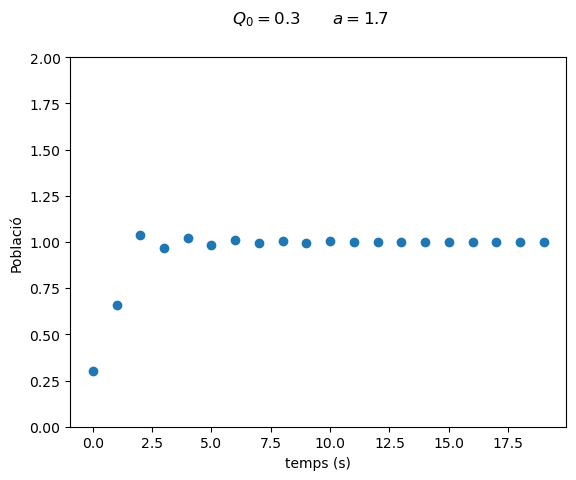

In [16]:
q = 0.3
a = 1.7

X = list(range(20))
Y = []
for x in X:
    Y.append(q)
    q = q + a * q * (1 - q)

fig, ax = plt.subplots()
fig.suptitle('$Q_0 = 0.3 \qquad a = 1.7$')

ax.scatter(X, Y)
ax.set_ylabel('Població')
ax.set_xlabel('temps (s)')
ax.set_ylim([0, 2])

plt.show()

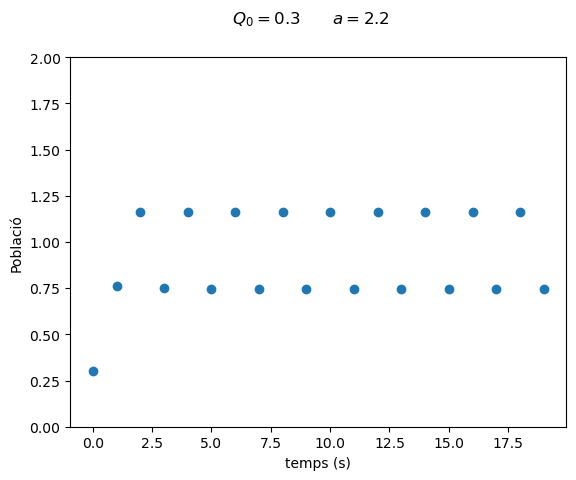

In [17]:
q = 0.3
a = 2.2

X = list(range(20))
Y = []
for x in X:
    Y.append(q)
    q = q + a * q * (1 - q)

fig, ax = plt.subplots()
fig.suptitle('$Q_0 = 0.3 \qquad a = 2.2$')

ax.scatter(X, Y)
ax.set_ylabel('Població')
ax.set_xlabel('temps (s)')
ax.set_ylim([0, 2])

plt.show()

- A valors més alts de $a$ ens podem trobar comportaments "estranys"

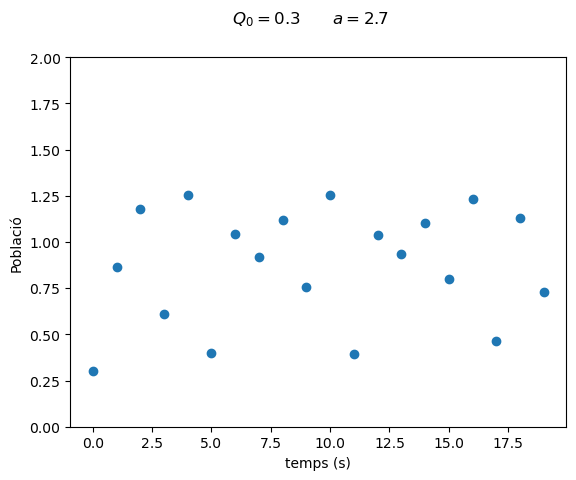

In [18]:
q = 0.3
a = 2.7

X = list(range(20))
Y = []
for x in X:
    Y.append(q)
    q = q + a * q * (1 - q)

fig, ax = plt.subplots()
fig.suptitle('$Q_0 = 0.3 \qquad a = 2.7$')

ax.scatter(X, Y)
ax.set_ylabel('Població')
ax.set_xlabel('temps (s)')
ax.set_ylim([0, 2])

plt.show()

- I si augmentem $Q_0$ a 0.5, tenim una distribució que pareix aleatòria

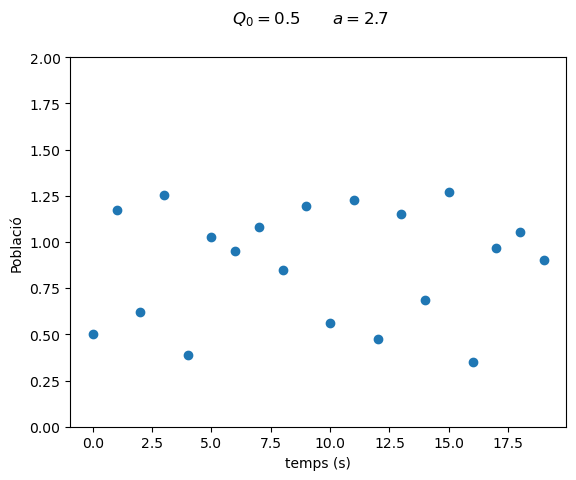

In [19]:
q = 0.5
a = 2.7

X = list(range(20))
Y = []
for x in X:
    Y.append(q)
    q = q + a * q * (1 - q)

fig, ax = plt.subplots()
fig.suptitle('$Q_0 = 0.5 \qquad a = 2.7$')

ax.scatter(X, Y)
ax.set_ylabel('Població')
ax.set_xlabel('temps (s)')
ax.set_ylim([0, 2])

plt.show()

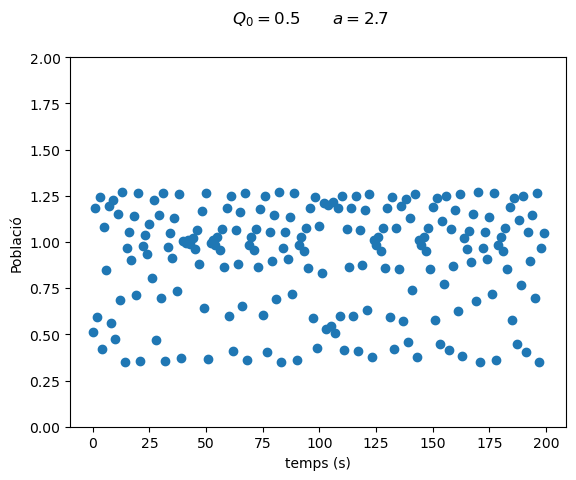

In [20]:
q = 0.51
a = 2.7

X = list(range(200))
Y = []
for x in X:
    Y.append(q)
    q = q + a * q * (1 - q)

fig, ax = plt.subplots()
fig.suptitle('$Q_0 = 0.5 \qquad a = 2.7$')

ax.scatter(X, Y)
ax.set_ylabel('Població')
ax.set_xlabel('temps (s)')
ax.set_ylim([0, 2])

plt.show()

- Si ho comparem amb l'expressió del creixement purament per naixements
$$\frac{d𝑃}{d𝑡} = 𝑎𝑃(𝑡)$$
    
$$P_{i+1} - P_i = aP_i$$

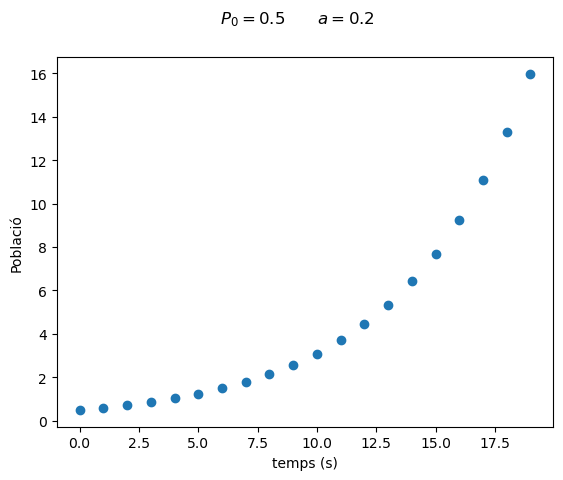

In [21]:
q = 0.5
a = 0.2

X = list(range(20))
Y = []
for x in X:
    Y.append(q)
    q = q + a * q

fig, ax = plt.subplots()
fig.suptitle('$P_0 = 0.5 \qquad a = 0.2$')

ax.scatter(X, Y)
ax.set_ylabel('Població')
ax.set_xlabel('temps (s)')
#ax.set_ylim([0, 10**3])

plt.show()

- Veiem una clara diferència entre el creixement exponencial discret i el creixement logístic discret
- El primer és un sistema dinàmic lineal
    - La diferència entre termes consecutius és lineal
- El creixement logístic discret és un sistema dinàmic no-lineal
    - La diferència entre termes consecutius és quadràtica

- El creixement logístic discret també té una dependència sensitiva a les condicions inicials.
    - Petites diferències en les condicions inicials suposen grans canvis en la progressió
- La dependència sensitiva és típica de la teoria del caos
- Aquesta teoria mostra com sistemes deterministics no lineals poden donar resultats que pareixen erràtics

## Interpretació del model en el context
- Un cop tenim resolt el nostre model tenim la tasca creativa d'interpretar-lo
- Tracta de separar els components del model
- Analitza representacions gràfiques dels resultats
- Compara els resultats amb els valors esperats
- Fes una anàlisi crític del resultat

# Bibliografia

- <a id='bib_Edwards'></a> Edwards, D., **2001**. *Guide to mathematical modelling*. Palgrave, Basingstoke.
- <a id='bib_Olinick'></a> Olinick, M., **2014**. Mathematical Modeling in the Social and Life Sciences. WILEY.

Copyright (C) 2022 Gabriel Jover Mañas

    Permission is granted to copy, distribute and/or modify this document
    under the terms of the GNU Free Documentation License, Version 1.3
    or any later version published by the Free Software Foundation;
    with no Invariant Sections, no Front-Cover Texts, and no Back-Cover Texts.
    A copy of the license is included in the section entitled "GNU
    Free Documentation License".

![GFDL][GFDL]

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https://www.gnu.org/licenses/>.

![GPL3][GPL3]

[GFDL]: https://www.gnu.org/graphics/gfdl-logo.svg
[GPL3]: https://www.gnu.org/graphics/gplv3-or-later.svg